# C++的多态

# 1. 多态简介

① 多态是C++面向对象三大特性之一。

② 多态分为两类：

1. 静态多态：函数重载和运算符重载属于静态多态，复用函数名。
2. 动态多态：派生类和虚函数实现运行时多态。

③ 静态多态和动态多态区别：

1. 静态多态的函数地址早绑定，编译阶段确定函数地址。
2. 动态多态的函数地址晚绑定，运行阶段确定函数地址。

④ 多态满足条件：

1. 有继承关系
2. 子类重写父类中的虚函数

⑤ 多态使用条件：

1. 父类指针或引用指向子类对象

⑥ 重写：函数返回值类型、函数名、参数列表都完全一致称为重写。

# 2. 多态地址绑定

## 2.1 地址早绑定

In [ ]:
#include <iostream>
using namespace std;

//多态

//动物类
class Animal
{
public:
    void speak()
    {
        cout << "动物在说话" << endl;
    }
};

//猫类
class Cat:public Animal
{
public:
    void speak()
    {
        cout << "小猫在说话" << endl;
    }
};

//执行说话的函数
//地址早绑定 在编译阶段确定函数地址
//如果想执行让猫说话，那么这个函数就不能提前绑定，需要在运行阶段进行绑定，地址晚绑定
void doSpeak(Animal &animal)  // Animal & animal = cat
{
    animal.speak();
}

void test01()
{
    Cat cat;
    doSpeak(cat);
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - 动物在说话  
 - 请按任意键继续. . .

## 2.2 地址晚绑定虚函数

In [ ]:
#include <iostream>
using namespace std;

//多态

//动物类
class Animal
{
public:
    virtual void speak()
    {
        cout << "动物在说话" << endl;
    }
};

//猫类
class Cat:public Animal
{
public:
    //重写 函数返回值类型、函数名、参数列表都完全相同才叫重写
    void speak()   //子类virtual可写可不写，也可以写 virtual void speak()
    {
        cout << "小猫在说话" << endl;
    }
};

//狗类
class Dog:public Animal
{
public:
    virtual void speak()
    {
        cout << "小狗在说话" << endl;
    }
};

//执行说话的函数
//地址早绑定 在编译阶段确定函数地址
//如果想执行让猫说话，那么这个函数就不能提前绑定，需要在运行阶段进行绑定，地址晚绑定

//动态多态满足条件
//1、有继承关系
//2、子类重写父类的虚函数

//动态多态使用
//父类的引用或指针指向子类对象

void doSpeak(Animal &animal)  // Animal & animal = cat
{
    animal.speak();
}

void test01()
{
    Cat cat;
    doSpeak(cat);

    Dog dog;
    doSpeak(dog);
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - 小猫在说话  
 - 小狗在说话  
 - 请按任意键继续. . .

# 3. 多态的原理剖析

① 当没有发生重写时，子类中的虚函数表内部为父类的虚函数地址。

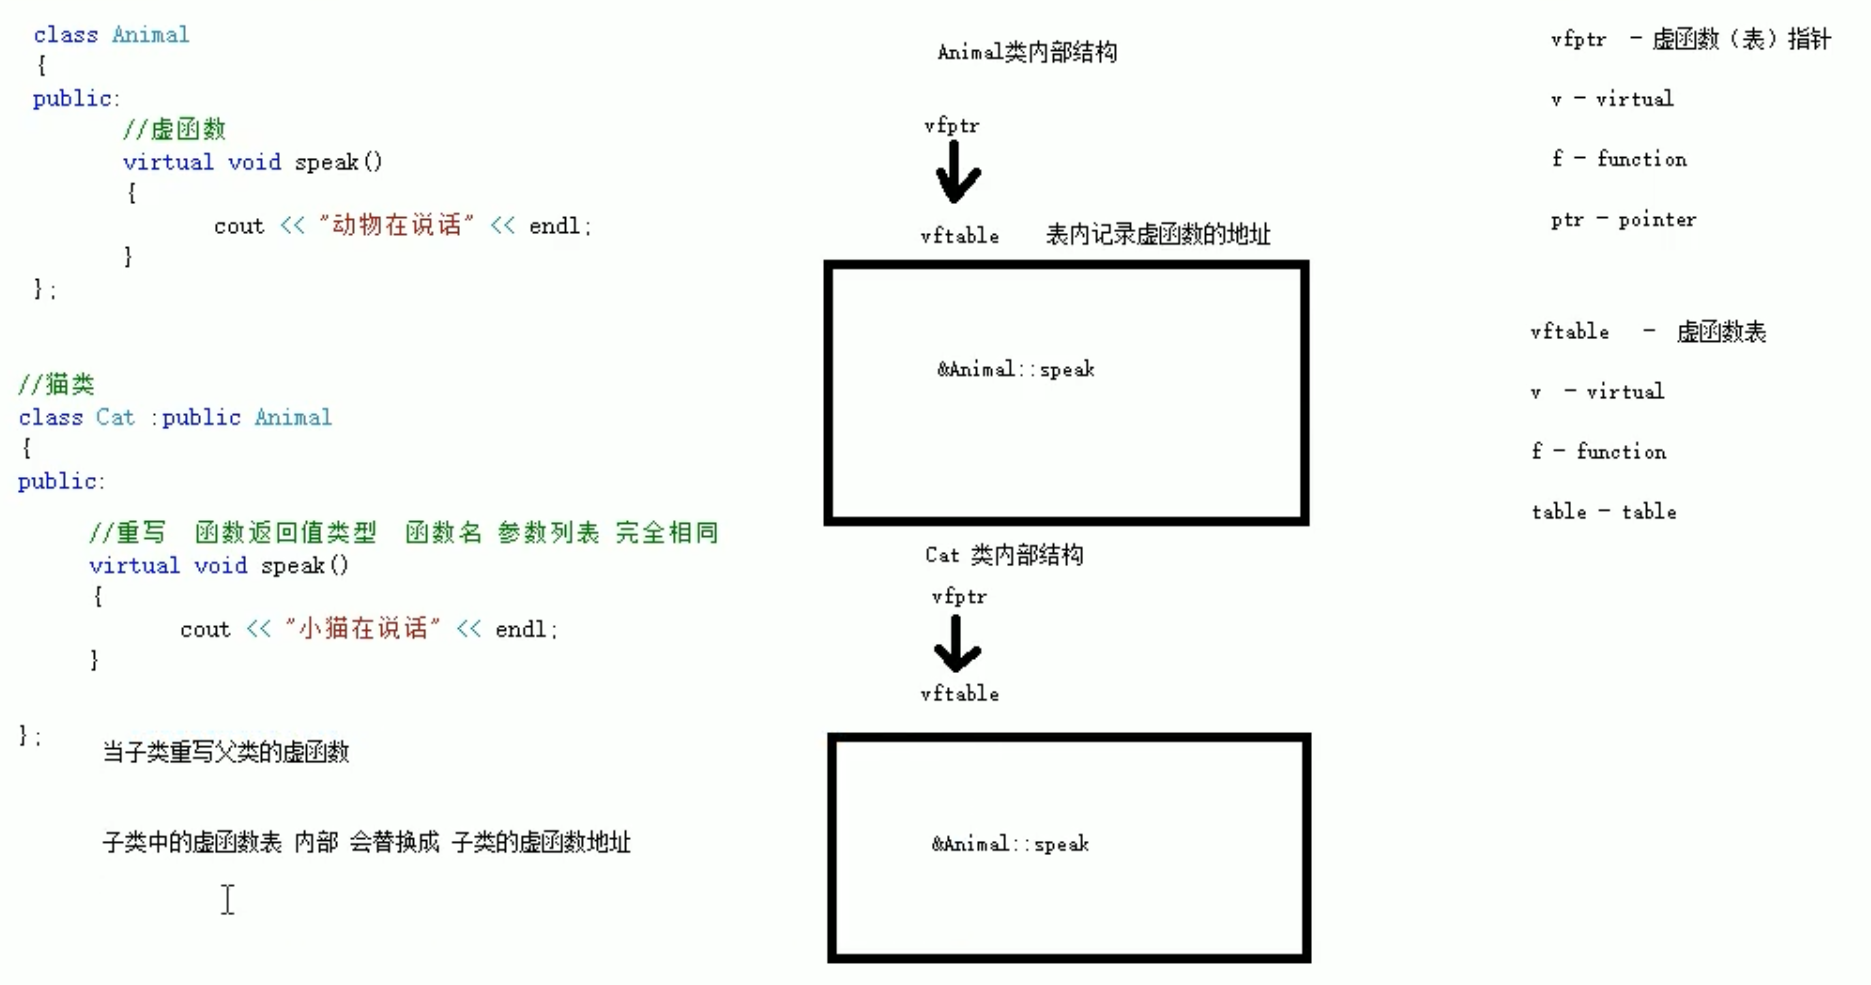

② 当子类重写父类的虚函数，子类中的虚函数表内部会替换成子类的虚函数地址。

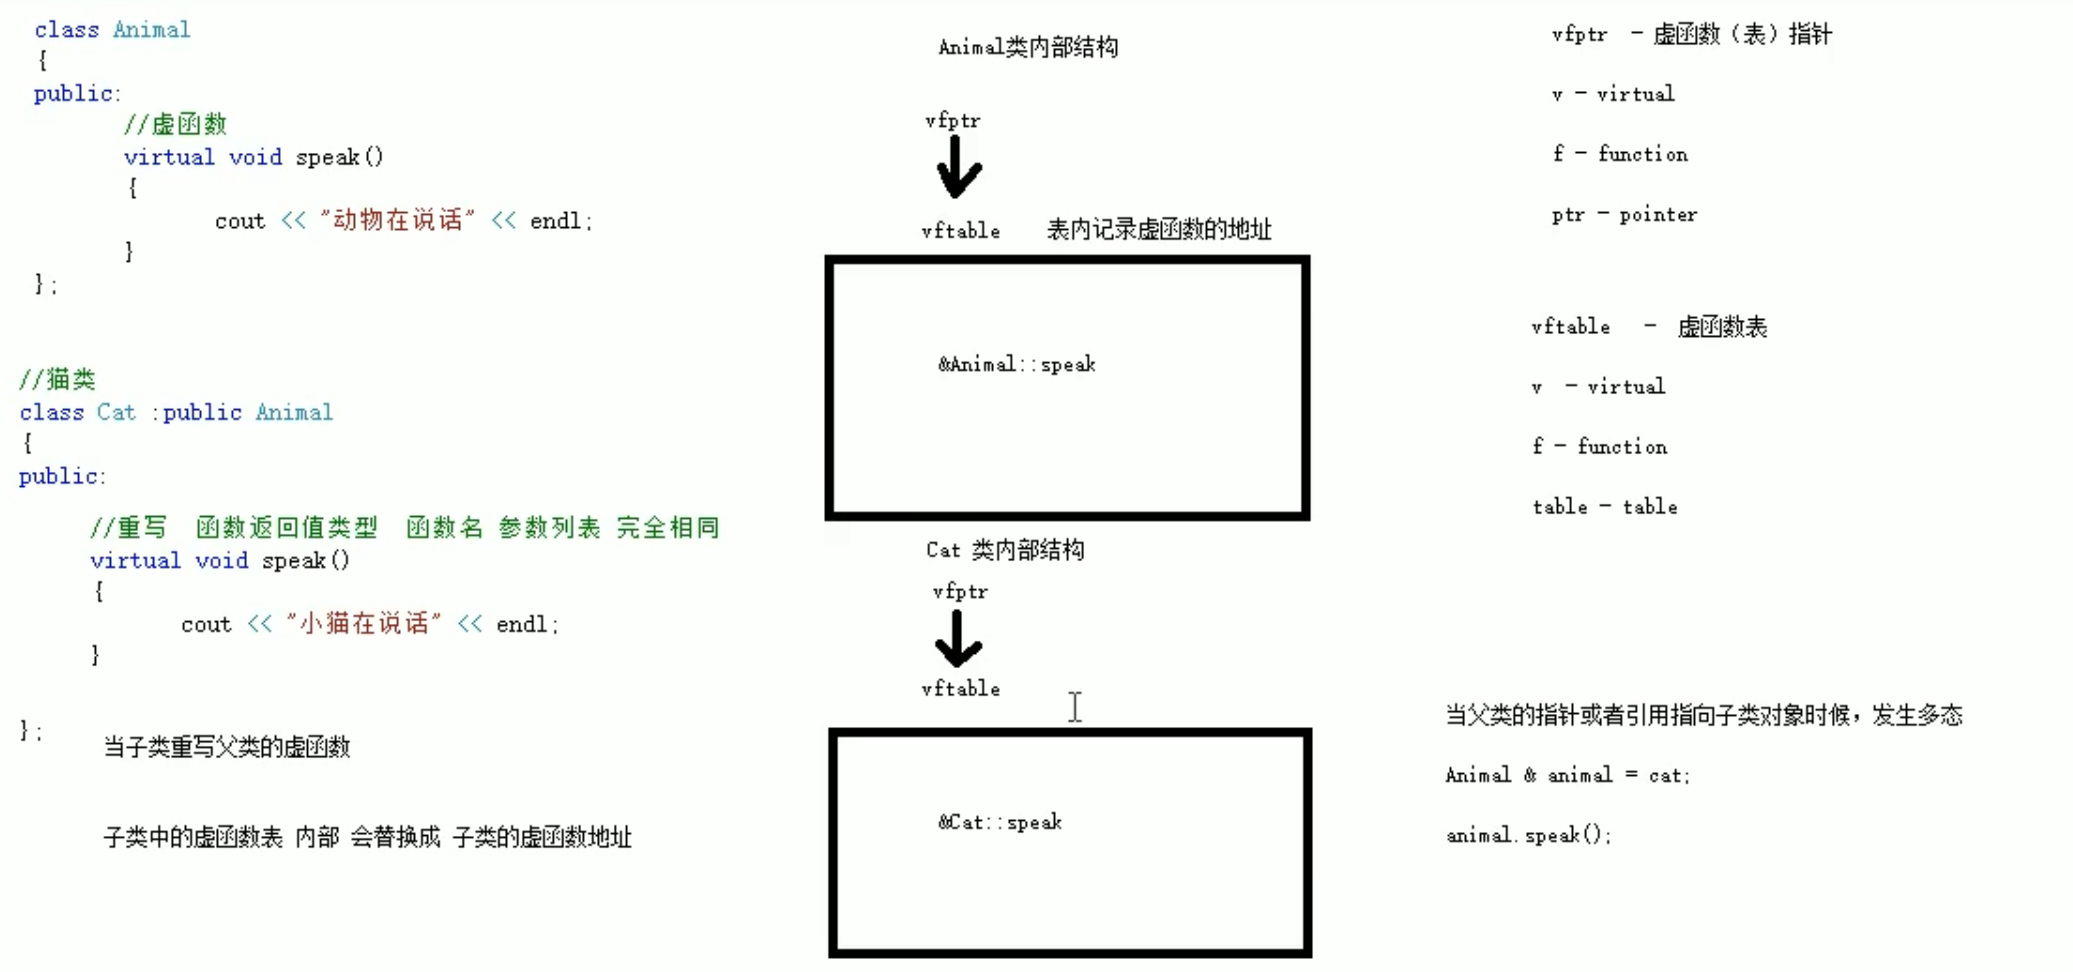

In [ ]:
#include <iostream>
using namespace std;

//多态

//动物类
class Animal
{
public:                   //如果是虚函数，那么类里面存了一个指针，类占4个字节
    virtual void speak()  //如果是非静态成员函数void speak()，那么函数不在类上，空类占1个字节空间                     
    {
        cout << "动物在说话" << endl;
    }
};

//猫类
class Cat:public Animal
{
public:

    void speak()   
    {
        cout << "小猫在说话" << endl;
    }
};

//狗类
class Dog:public Animal
{
public:
    virtual void speak()
    {
        cout << "小狗在说话" << endl;
    }
};

//执行说话的函数
//地址早绑定 在编译阶段确定函数地址
//如果想执行让猫说话，那么这个函数就不能提前绑定，需要在运行阶段进行绑定，地址晚绑定

//动态多态满足条件
//1、有继承关系
//2、子类重写父类的虚函数

//动态多态使用
//父类的引用或指针指向子类对象

void doSpeak(Animal &animal)  // Animal & animal = cat
{
    animal.speak();
}

void test01()
{
    Cat cat;
    doSpeak(cat);

    Dog dog;
    doSpeak(dog);
}

void test02()
{
    cout << "sizeof Animal = " << sizeof(Animal) << endl;
}

int main()
{
    //test01();
    test02();

    system("pause");

    return 0;

}

运行结果：  
 - sizeof Animal = 4  
 - 请按任意键继续. . .

# 4. 纯虚函数和抽象类

① 在多态中，通常父类中虚函数的实现时毫无意义的，主要都是调用子类重写的内容。因此，可以将虚函数改为纯虚函数。

② 纯虚函数语法：virtual 返回值类型 函数名 (参数列表) = 0；

③ 当类中有了纯虚函数，这个类也称为抽象类。

④ 抽象类特点：

1. 无法实例化对象
2. 子类必须重写抽象类中的纯虚函数，否则也属于抽象类。

In [ ]:
#include <iostream>
using namespace std;

//纯虚函数和抽象类
class Base
{
public:
    //纯虚函数
    //只要有一个纯虚函数，这个类称为抽象类
    //抽象类特点：
    //1、无法实例化对象
    //2、抽象类的子类 必须要重写父类中的纯虚函数，否则也属于抽象类
    virtual void func() = 0;
};

class Son : public Base
{
public:
    virtual void func()
    {
        cout << "func函数调用" << endl;
     }
};
void test01()
{
    //Base b;   //抽象类是无法实例化对象
    //new Base; //抽象类是无法实例化对象

    //Son s; //子类中必须重写父类中的纯虚函数，否则无法实例化对象

    Base* base = new Son;
    base->func();
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - func函数调用  
 - 请按任意键继续. . .

# 5. 虚析构和纯虚析构

① 多态使用时，如果子类中有属性开辟到堆区，那么父类指针在释放时无法调用子类的析构代码。

② 解决方式：将父类中的析构函数改为虚析构或者纯虚析构。

③ 虚析构和纯虚析构共性：

1. 可以解决父类指针释放子类对象
2. 都需要有具体的函数实现

④ 虚析构语法：virtual.类名(){}

⑤ 纯虚析构语法：

1. virtual~类名 = 0；
2. 类名::~类名(){}

① 虚析构或纯虚析构就是用来解决通过父类指针释放子类对象。

② 如果子类中没有堆区数据，可以不写为虚析构或纯虚析构。

③ 拥有纯虚析构函数的类也属于抽象类。

In [ ]:
#include <iostream>
using namespace std;
#include<string>

//纯虚函数和纯虚机构
class Animal 
{
public:
    Animal()
    {
        cout << "Animal构造函数调用" << endl;
    }

    //纯虚函数
    virtual void speak() = 0;

    /*
    //利用虚析构可以解决，父类指针释放子类对象时不干净的问题
    virtual ~Animal()
    {
        cout << "Animal析构函数调用" << endl;
    }
    */

    //纯虚析构 需要声明也需要实现
    //有了纯虚析构之后，这个类也属于抽象类，无法实例化对象
    virtual ~Animal() = 0;
    
};

Animal::~Animal()
{
    cout << "Animal纯虚析构函数调用" << endl;
}


class Cat : public Animal
{
public:
    Cat(string name)
    {
        cout << "Cat构造函数调用" << endl;
        m_Name = new string(name);
    }

    virtual void speak()
    {
        cout << *m_Name << "小猫在说话" << endl;
     }

    ~Cat()
    {
        if (m_Name != NULL)
        {
            cout << "Cat析构函数调用" << endl;
            delete m_Name;
            m_Name = NULL;
        }
    }

    string* m_Name;
};

void test01()
{
    Animal* animal = new Cat("Tom");
    animal->speak();
    //父类指针在析构时候，不会调用子类中析构函数，导致子类如果有堆区属性，出现内存泄露
    delete animal;
}

int main()
{
    test01();

    system("pause");

    return 0;
}

运行结果：  
 - Animal构造函数调用  
 - Cat构造函数调用  
 - Tom小猫在说话  
 - Cat析构函数调用  
 - Animal纯虚析构函数调用  
 - 请按任意键继续. . .

# 6. 计算器

① 案例描述：分布利用普通写法和多态技术，设计实现两个操作数进行运算的计算器类。

② 多态的优点：  
1. 代码组织结构清晰。 
2. 多可读性强。
3. 利于前期和后期的扩展以及维护。

③ C++开发提倡利用多态设计程序架构，因为多态优点很多。

## 6.1 普通写法实现多态

In [ ]:
#include <iostream>
using namespace std;
#include<string>

//普通方法实现多态

class Calculator
{
public:
    int getResult(string oper)
    {
        if (oper == "+")
        {
            return m_Num1 + m_Num2;
        }
        else if (oper == "-")
        {
            return m_Num1 - m_Num2;
        }
        else if (oper == "*")
        {
            return m_Num1 * m_Num2;
        }
        //如果想扩展新的功能，需要修改源码
        //在真的开发中 提倡 开闭原则
        //开闭原则：对扩展进行开发，对修改进行关闭
    }
    int m_Num1; //操作数1
    int m_Num2; //操作数2
};

void test01()
{
    //创建计算器对象
    Calculator c;
    c.m_Num1 = 10;
    c.m_Num2 = 10;

    cout << c.m_Num1 << "+" << c.m_Num2 << "=" << c.getResult("+") << endl;

    cout << c.m_Num1 << "-" << c.m_Num2 << "=" << c.getResult("-") << endl;

    cout << c.m_Num1 << "*" << c.m_Num2 << "=" << c.getResult("*") << endl;
    
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - 10+10=20  
 - 10-10=0  
 - 10*10=100   
 - 请按任意键继续. . .

## 6.2 多态设计程序架构

In [ ]:
#include <iostream>
using namespace std;
#include<string>

//普通方法实现多态

#include <iostream>
using namespace std;

//多态

class AbstractCalculator
{
public:
    virtual int getResult()
    {
        return 0;
    }
    int m_Num1;
    int m_Num2;

};

//加法计算器类
class AddCalculator : public AbstractCalculator
{
public:
    int getResult()
    {
        return m_Num1 + m_Num2;
    }
};

//减法计算器类
class SubCalculator : public AbstractCalculator
{
public:
    int getResult()
    {
        return m_Num1 - m_Num2;
    }
};

//乘法计算器类
class MulCalculator : public AbstractCalculator
{
public:
    int getResult()
    {
        return m_Num1 * m_Num2;
    }
};

void test02()
{
    //多态使用条件
    //父类指针或者引用指向子类对象
    AbstractCalculator* abc = new AddCalculator;  //这里用的是父类指针指向子类对象
    abc->m_Num1 = 100;
    abc->m_Num2 = 200;

    cout << abc->m_Num1 << "+" << abc->m_Num2 << "=" << abc->getResult() << endl;
    //用完后记得销毁
    delete abc;

    //减法运算
    abc = new SubCalculator;  //指针并没有释放
    abc->m_Num1 = 100;
    abc->m_Num2 = 200;

    cout << abc->m_Num1 << "-" << abc->m_Num2 << "=" << abc->getResult() << endl;
    //用完后记得销毁
    delete abc;

    //乘法运算
    abc = new MulCalculator;  //指针并没有释放
    abc->m_Num1 = 100;
    abc->m_Num2 = 200;

    cout << abc->m_Num1 << "*" << abc->m_Num2 << "=" << abc->getResult() << endl;
    //用完后记得销毁
    delete abc;
}

int main()
{
    test02();

    system("pause");

    return 0;

}

运行结果：  
 - 100+200=300  
 - 100-200=-100  
 - 100*200=20000   
 - 请按任意键继续. . .

# 7. 制作饮品

① 案例描述：制作饮品的大致流程为：煮水 - 冲泡 - 倒入杯中 - 加入辅料

② 利用多态技术实现本案例，提供抽象制作饮品基类，提供子类制作咖啡和茶叶。

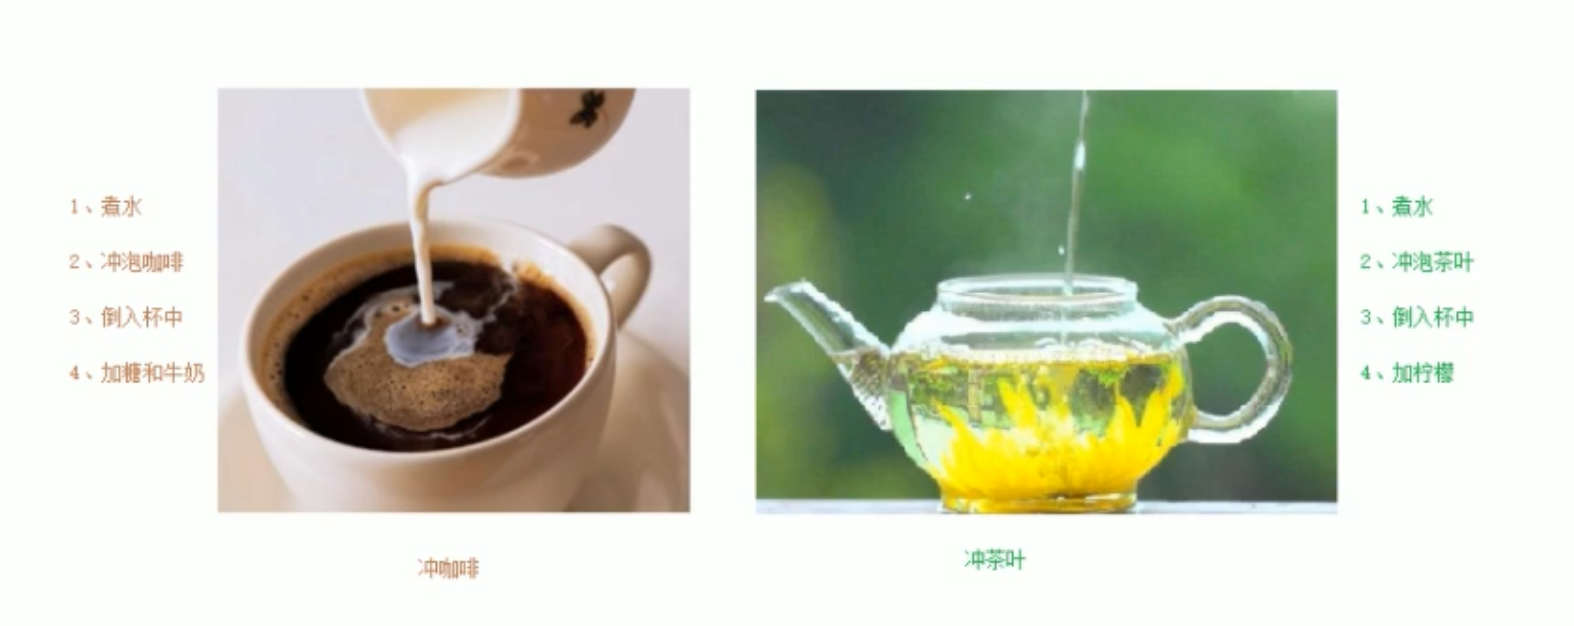

In [ ]:
#include <iostream>
using namespace std;

class AbstractDring
{
public:
    //煮水
    virtual void Boil() = 0;

    //冲泡
    virtual void Brew() = 0;

    //倒入杯中
    virtual void PourInCup() = 0;

    //加入辅料
    virtual void PutSomething() = 0;

    //制作饮品
    void makeDrink()
    {
        Boil();
        Brew();
        PourInCup();
        PutSomething();
    }

};

//制作咖啡
class Coffee :public AbstractDring
{
public:
    //煮水
    virtual void Boil()
    {
        cout << "煮农夫山泉" << endl;
    }

    //冲泡
    virtual void Brew()
    {
        cout << "冲泡咖啡" << endl;
    }

    //倒入杯中
    virtual void PourInCup()
    {
        cout << "倒入杯中" << endl;
    }

    //加入辅料
    virtual void PutSomething()
    {
        cout << "加入糖和牛奶" << endl;
    }
};

//制作茶叶
class Tea :public AbstractDring
{
public:
    //煮水
    virtual void Boil()
    {
        cout << "煮茶叶" << endl;
    }

    //冲泡
    virtual void Brew()
    {
        cout << "冲泡茶叶" << endl;
    }

    //倒入杯中
    virtual void PourInCup()
    {
        cout << "倒入杯中" << endl;
    }

    //加入辅料
    virtual void PutSomething()
    {
        cout << "加入枸杞" << endl;
    }
};

//制作函数
void doWork(AbstractDring* abs)
{
    abs->makeDrink();
    delete abs;  //释放
}

void test01()
{
    //制作咖啡
    doWork(new Coffee);
    cout << "----------------" << endl;
    doWork(new Tea);
}

int main()
{
    test01();

    system("pause");

    return 0;

}

运行结果：  
 - 煮农夫山泉  
 - 冲泡咖啡  
 - 倒入杯中  
 - 加入糖和牛奶  
 - $----------------$  
 - 煮茶叶  
 - 冲泡茶叶  
 - 倒入杯中  
 - 加入枸杞  
 - 请按任意键继续. . .

# 8. 电脑组装

案例描述：电脑用主要组成部件为CPU(用于计算)，显卡(用于显示)，内存条(用于存储)，将每个零件封装出抽象基类；并且提供不同的厂商生产不同的零件，例如intel厂商和Lennovo厂商；创建电脑类提供电脑工作的函数，并且调用每个零件工作的接口。测试时组装三台不同的电脑进行工作。

In [ ]:
#include <iostream>
using namespace std;
#include<string>

//抽象不同零件类
//抽象CPU类
class CPU
{
public:
    //抽象的计算函数
    virtual void calculate() = 0;
};

//抽象显卡类
class VideoCard
{
public:
    //抽象的显示函数
    virtual void display() = 0;
};

//抽象内存条类
class Memory
{
public:
    //抽象的存储函数
    virtual void storage() = 0;
};

//电脑类
class Computer
{
public:
    Computer(CPU* cpu, VideoCard* vc, Memory* mem)
    {
        m_cpu = cpu;
        m_vc = vc;
        m_mem = mem;
    }

    //提供工作的函数
    void work()
    {
        m_cpu->calculate();
        m_vc->display();
        m_mem->storage();
    }

    //提供析构函数 释放3个电脑零件
    ~Computer()
    {
        if (m_cpu != NULL)
        {
            delete m_cpu;
            m_cpu = NULL;
        }

        if (m_vc != NULL)
        {
            delete m_vc;
            m_vc = NULL;
        }

        if (m_mem != NULL)
        {
            delete m_mem;
            m_mem = NULL;
        }
    }

private:
    CPU* m_cpu; //CPU的零件指针
    VideoCard* m_vc; //显卡零件指针
    Memory* m_mem; //内存条零件指针
};

//具体厂商
//Intel厂商
class IntelCPU : public CPU
{
public:
    virtual void calculate()
    {
        cout << "Intel的CPU开始计算了！" << endl;
    }
};

class IntelVideoCard : public VideoCard
{
public:
    virtual void display()
    {
        cout << "Intel的显卡开始计算了！" << endl;
    }
};

class IntelMemory : public Memory
{
public:
    virtual void storage()
    {
        cout << "Intel的内存条开始存储了！" << endl;
    }
};

//Lenovo厂商
class LenovoCPU : public CPU
{
public:
    virtual void calculate()
    {
        cout << "Lenovo的CPU开始计算了！" << endl;
    }
};

class LenovoVideoCard : public VideoCard
{
public:
    virtual void display()
    {
        cout << "Lenovo的显卡开始计算了！" << endl;
    }
};

class LenovoMemory : public Memory
{
public:
    virtual void storage()
    {
        cout << "Lenovo的内存条开始存储了！" << endl;
    }
};

void test01()
{
    //第一台电脑零件
    CPU* intelCpu = new IntelCPU;
    VideoCard* intelCard = new IntelVideoCard;
    Memory* intelMem = new IntelMemory;

    cout << "第一台电脑开始工作：" << endl;
    //创建第一台电脑
    Computer* computer1 = new Computer(intelCpu, intelCard, intelMem);
    computer1->work();
    delete computer1;

    cout << "---------" << endl;
    cout << "第二台电脑开始工作：" << endl;
    //创建第二台电脑
    Computer* computer2 = new Computer(new LenovoCPU, new LenovoVideoCard, new LenovoMemory);
    computer2->work();
    delete computer2;

    cout << "---------" << endl;
    cout << "第三台电脑开始工作：" << endl;
    //创建第三台电脑
    Computer* computer3 = new Computer(new IntelCPU, new LenovoVideoCard, new LenovoMemory);
    computer3->work();
    delete computer3;
}

int main()
{
    test01();

    system("pause");

    return 0;
}

运行结果：  
 - 第一台电脑开始工作：  
 - Intel的CPU开始计算了！  
 - Intel的显卡开始计算了！  
 - Intel的内存条开始存储了！  
 - $---------$  
 - 第二台电脑开始工作：  
 - Lenovo的CPU开始计算了！  
 - Lenovo的显卡开始计算了！  
 - Lenovo的内存条开始存储了！  
 - $---------$  
 - 第三台电脑开始工作：  
 - Intel的CPU开始计算了！  
 - Lenovo的显卡开始计算了！  
 - Lenovo的内存条开始存储了！  
 - 请按任意键继续. . .